In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def undistort_dohko(imagem):
    mtx = np.array([[772.07218515,0.,634.15206573],[0.,771.9959048,366.5862172],[0.,0.,1.]])
    dist = np.array([[0.09361794,-0.22823167,0.00027023,-0.00095334,0.09892737]])
    return cv2.undistort(imagem, mtx , dist)

In [3]:
captura_triangulo = "triangulo.jpg"

In [4]:
imagem = cv2.imread(captura_triangulo)
imagem = undistort_dohko(imagem)
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
imagem_gray = np.array(imagem_gray, dtype=np.float32)

In [5]:
imagem_gray

array([[184., 184., 184., ..., 176., 176., 176.],
       [183., 183., 184., ..., 176., 176., 176.],
       [184., 184., 183., ..., 175., 175., 176.],
       ...,
       [120., 121., 121., ...,  96.,  96.,  95.],
       [119., 120., 120., ...,  96.,  96.,  95.],
       [119., 120., 120., ...,  96.,  96.,  95.]], dtype=float32)

In [6]:
r_0 = cv2.cornerHarris(imagem_gray, 7, 3, 0.015)

In [7]:
r_0.max()

388229.47

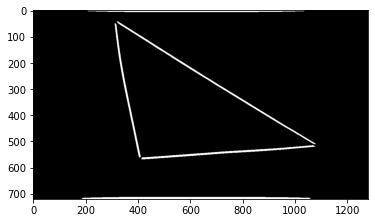

In [8]:
plt.imshow(r_0<-4000,  cmap='gray')

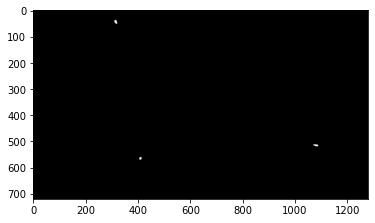

In [9]:
plt.imshow(r_0>4000, cmap='gray')

In [10]:
cantos = cv2.goodFeaturesToTrack(imagem_gray, 3, 0.01, 10)
cantos = cantos.reshape((len(cantos), 2))

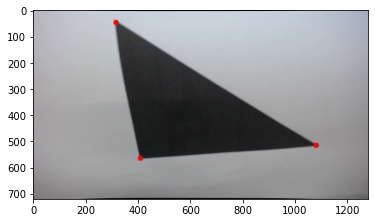

In [15]:
for n in cantos:
    cv2.circle(imagem, tuple(n.astype('int')), 10, (255,0,0), -1)
plt.imshow(imagem)

In [16]:
matcher = cv2.BFMatcher(normType=cv2.NORM_L2, crossCheck=False)

In [17]:
captura_triangulo_2 = "triangulo2.jpg"
imagem_2 = cv2.imread(captura_triangulo_2)
imagem_2 = undistort_dohko(imagem_2)
imagem_gray_2 = cv2.cvtColor(imagem_2, cv2.COLOR_BGR2GRAY)
imagem_gray_2 = np.array(imagem_gray_2, dtype=np.float32)
cantos_2 = cv2.goodFeaturesToTrack(imagem_gray_2, 3, 0.01, 10)
cantos_2 = cantos_2.reshape((len(cantos_2), 2))

In [18]:
matches = matcher.match(cantos_2, cantos)

In [19]:
kp1 = np.array([cv2.KeyPoint(*x, 3) for x in cantos])
kp2 = np.array([cv2.KeyPoint(*x, 3) for x in cantos_2])

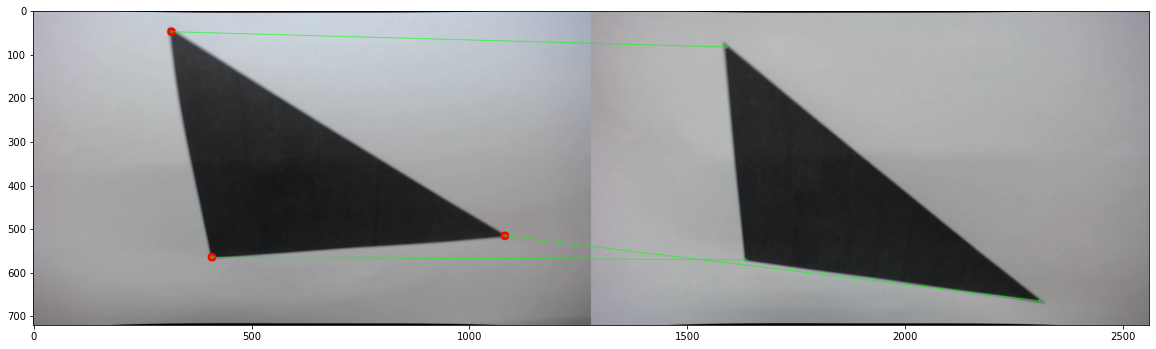

In [20]:
imagem_match = cv2.drawMatches(imagem,kp1,imagem_2,kp2,matches,None,matchColor=(0,255,0))

plt.figure(figsize = (20,20))
plt.imshow(imagem_match)

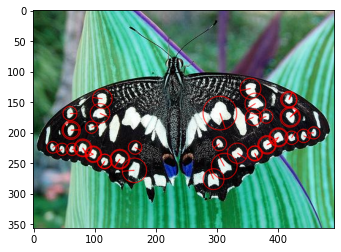

In [38]:
borboleta = cv2.imread("borboleta.jpg")

surf = cv2.xfeatures2d.SURF_create(60000)
kp1, desc1 = surf.detectAndCompute(borboleta, None)
nova_borboleta = cv2.drawKeypoints(borboleta, kp1, borboleta, (255,0,0), flags=5)
plt.imshow(nova_borboleta)

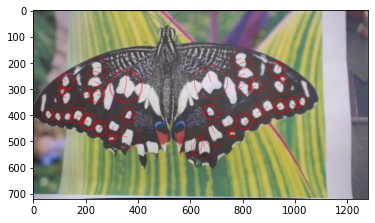

In [39]:
brabuleta = undistort_dohko(cv2.imread("brabuleta.jpg"))
surf.setHessianThreshold(18000)
kp2, desc2 = surf.detectAndCompute(brabuleta, None)
nova_brabuleta = cv2.drawKeypoints(brabuleta, kp2, brabuleta, (255,0,0), flags=5)
plt.imshow(nova_brabuleta)